In [1]:
import time
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler # 표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.datasets import load_iris
# cross_val_score: 다양한 샘플링으 ㄹ해서 여러번 테스트 --> 평균치를 구해본다.!
from sklearn.metrics import *
%matplotlib inline

# 주요 라이브러리 import

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm


# 디렉토리 및 파일 이름에 맞추어 변경
font_location = 'C:/Users/hi/Himedia_jupyter/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
import scipy.io as spio


In [2]:
import pyreadstat
df, meta = pyreadstat.read_sav('kor_data_20100058.sav')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10094 entries, 0 to 10093
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10094 non-null  float64
 1   sex     10094 non-null  float64
 2   age     10094 non-null  float64
 3   area    10093 non-null  float64
 4   q1      10094 non-null  float64
 5   q2      2090 non-null   float64
 6   q3      5196 non-null   float64
 7   q4      4574 non-null   float64
 8   q5      4574 non-null   float64
 9   q6      3435 non-null   float64
 10  q7      3121 non-null   float64
 11  q8      314 non-null    float64
 12  q9      3435 non-null   float64
 13  q10     3435 non-null   float64
 14  q11     3435 non-null   float64
 15  q12     3435 non-null   float64
 16  q13     3435 non-null   float64
 17  q14     3435 non-null   float64
 18  q15     3435 non-null   float64
 19  q16     10094 non-null  float64
 20  q17     10094 non-null  float64
 21  q18     10094 non-null  float64
 22

In [4]:
df

,ID,sex,age,area,q1,q2,q3,q4,q5,q6,...,q14,q15,q16,q17,q18,q19,q20,q21,q22,wt
0,1.0,1.0,3.0,1.0,2.0,NaN,NaN,1.0,6.0,NaN,...,NaN,NaN,1.0,6.0,1.0,1.0,1.0,7.0,1.0,0.518
1,2.0,2.0,2.0,6.0,3.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,1.0,2.0,1.0,2.0,1.0,1.0,0.392
2,3.0,1.0,4.0,2.0,2.0,NaN,NaN,1.0,2.0,NaN,...,NaN,NaN,3.0,3.0,1.0,1.0,5.0,5.0,4.0,1.143
3,4.0,1.0,5.0,5.0,2.0,NaN,NaN,1.0,1.0,NaN,...,NaN,NaN,4.0,7.0,1.0,1.0,2.0,5.0,5.0,1.940
4,5.0,2.0,2.0,3.0,2.0,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,2.0,5.0,1.0,1.0,1.0,3.0,2.0,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10089,12004.0,1.0,3.0,2.0,1.0,NaN,2.0,1.0,1.0,NaN,...,NaN,NaN,3.0,7.0,2.0,2.0,1.0,7.0,1.0,0.957
10090,12005.0,2.0,2.0,4.0,1.0,NaN,1.0,NaN,NaN,1.0,...,4.0,1.0,2.0,4.0,3.0,1.0,1.0,5.0,1.0,0.441
10091,12006.0,1.0,3.0,2.0,1.0,NaN,1.0,NaN,NaN,1.0,...,6.0,1.0,2.0,3.0,1.0,1.0,1.0,6.0,8.0,0.957
10092,12007.0,1.0,5.0,5.0,1.0,NaN,1.0,NaN,NaN,1.0,...,4.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,4.0,1.940


In [5]:
##df.to_csv('2010여름휴가csv.csv')

In [6]:
df.isna().sum()

ID         0
sex        0
age        0
area       1
q1         0
q2      8004
q3      4898
q4      5520
q5      5520
q6      6659
q7      6973
q8      9780
q9      6659
q10     6659
q11     6659
q12     6659
q13     6659
q14     6659
q15     6659
q16        0
q17        0
q18        0
q19        0
q20        0
q21        0
q22        0
wt         1
dtype: int64

In [7]:
df = df[df['q6']==1]
df.isna().sum()

ID         0
sex        0
age        0
area       0
q1         0
q2      3120
q3         0
q4      3121
q5      3121
q6         0
q7         0
q8      3121
q9         0
q10        0
q11        0
q12        0
q13        0
q14        0
q15        0
q16        0
q17        0
q18        0
q19        0
q20        0
q21        0
q22        0
wt         0
dtype: int64

In [8]:
df.drop(columns=(['ID', 'q2', 'q4', 'q5', 'q8', 'wt']), inplace=True)


In [9]:
df.isna().sum()

sex     0
age     0
area    0
q1      0
q3      0
q6      0
q7      0
q9      0
q10     0
q11     0
q12     0
q13     0
q14     0
q15     0
q16     0
q17     0
q18     0
q19     0
q20     0
q21     0
q22     0
dtype: int64

In [10]:
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3121 entries, 0 to 3120
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   3121 non-null   int64  
 1   sex     3121 non-null   float64
 2   age     3121 non-null   float64
 3   area    3121 non-null   float64
 4   q1      3121 non-null   float64
 5   q3      3121 non-null   float64
 6   q6      3121 non-null   float64
 7   q7      3121 non-null   float64
 8   q9      3121 non-null   float64
 9   q10     3121 non-null   float64
 10  q11     3121 non-null   float64
 11  q12     3121 non-null   float64
 12  q13     3121 non-null   float64
 13  q14     3121 non-null   float64
 14  q15     3121 non-null   float64
 15  q16     3121 non-null   float64
 16  q17     3121 non-null   float64
 17  q18     3121 non-null   float64
 18  q19     3121 non-null   float64
 19  q20     3121 non-null   float64
 20  q21     3121 non-null   float64
 21  q22     3121 non-null   float64
dtype

In [11]:
df = df.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3121 entries, 0 to 3120
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   index   3121 non-null   category
 1   sex     3121 non-null   category
 2   age     3121 non-null   category
 3   area    3121 non-null   category
 4   q1      3121 non-null   category
 5   q3      3121 non-null   category
 6   q6      3121 non-null   category
 7   q7      3121 non-null   category
 8   q9      3121 non-null   category
 9   q10     3121 non-null   category
 10  q11     3121 non-null   category
 11  q12     3121 non-null   category
 12  q13     3121 non-null   category
 13  q14     3121 non-null   category
 14  q15     3121 non-null   category
 15  q16     3121 non-null   category
 16  q17     3121 non-null   category
 17  q18     3121 non-null   category
 18  q19     3121 non-null   category
 19  q20     3121 non-null   category
 20  q21     3121 non-null   category
 21  q22     3121 n

In [12]:
df.drop(columns=['index'], inplace=True)
df

,sex,age,area,q1,q3,q6,q7,q9,q10,q11,...,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22
0,1.0,2.0,2.0,1.0,1.0,1.0,3.0,6.0,5.0,2.0,...,2.0,1.0,1.0,2.0,4.0,2.0,1.0,7.0,5.0,9.0
1,1.0,3.0,4.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,...,1.0,4.0,1.0,3.0,4.0,1.0,1.0,1.0,6.0,5.0
2,1.0,5.0,3.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,...,2.0,3.0,1.0,3.0,6.0,2.0,2.0,1.0,1.0,3.0
3,2.0,2.0,6.0,1.0,1.0,1.0,3.0,1.0,4.0,1.0,...,2.0,4.0,1.0,2.0,6.0,3.0,2.0,1.0,1.0,1.0
4,2.0,2.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,...,2.0,1.0,2.0,2.0,3.0,2.0,1.0,1.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,1.0,4.0,6.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,...,2.0,6.0,5.0,2.0,1.0,1.0,1.0,1.0,7.0,1.0
3117,2.0,2.0,4.0,1.0,1.0,1.0,3.0,1.0,4.0,2.0,...,2.0,4.0,1.0,2.0,4.0,3.0,1.0,1.0,5.0,1.0
3118,1.0,3.0,2.0,1.0,1.0,1.0,3.0,1.0,4.0,2.0,...,2.0,6.0,1.0,2.0,3.0,1.0,1.0,1.0,6.0,8.0
3119,1.0,5.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,...,2.0,4.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,4.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3121 entries, 0 to 3120
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     3121 non-null   category
 1   age     3121 non-null   category
 2   area    3121 non-null   category
 3   q1      3121 non-null   category
 4   q3      3121 non-null   category
 5   q6      3121 non-null   category
 6   q7      3121 non-null   category
 7   q9      3121 non-null   category
 8   q10     3121 non-null   category
 9   q11     3121 non-null   category
 10  q12     3121 non-null   category
 11  q13     3121 non-null   category
 12  q14     3121 non-null   category
 13  q15     3121 non-null   category
 14  q16     3121 non-null   category
 15  q17     3121 non-null   category
 16  q18     3121 non-null   category
 17  q19     3121 non-null   category
 18  q20     3121 non-null   category
 19  q21     3121 non-null   category
 20  q22     3121 non-null   category
dtypes: category(21

In [14]:
df['age'] = df['age'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3121 entries, 0 to 3120
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     3121 non-null   category
 1   age     3121 non-null   float64 
 2   area    3121 non-null   category
 3   q1      3121 non-null   category
 4   q3      3121 non-null   category
 5   q6      3121 non-null   category
 6   q7      3121 non-null   category
 7   q9      3121 non-null   category
 8   q10     3121 non-null   category
 9   q11     3121 non-null   category
 10  q12     3121 non-null   category
 11  q13     3121 non-null   category
 12  q14     3121 non-null   category
 13  q15     3121 non-null   category
 14  q16     3121 non-null   category
 15  q17     3121 non-null   category
 16  q18     3121 non-null   category
 17  q19     3121 non-null   category
 18  q20     3121 non-null   category
 19  q21     3121 non-null   category
 20  q22     3121 non-null   category
dtypes: category(20

In [15]:
df['sex'].value_counts()

2.0    1858
1.0    1263
Name: sex, dtype: int64

In [16]:
df['q6'].value_counts()

1.0    3121
Name: q6, dtype: int64

In [17]:
df['age'].value_counts()

3.0    1123
2.0    1102
4.0     631
5.0     265
Name: age, dtype: int64

In [18]:
df['area'].value_counts()

2.0    980
1.0    870
3.0    418
4.0    276
6.0    272
5.0    232
7.0     73
Name: area, dtype: int64

In [19]:
sex_list = list(df['sex'])
sex_list[:5]

[1.0, 1.0, 1.0, 2.0, 2.0]

In [20]:
sex_list2 = []
for i in sex_list:
    if i == 1.0:
        sex_list2.append('male')
    else:
        sex_list2.append('female')
sex_list2[:10]

['male',
 'male',
 'male',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female',
 'female']

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3121 entries, 0 to 3120
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   sex     3121 non-null   category
 1   age     3121 non-null   float64 
 2   area    3121 non-null   category
 3   q1      3121 non-null   category
 4   q3      3121 non-null   category
 5   q6      3121 non-null   category
 6   q7      3121 non-null   category
 7   q9      3121 non-null   category
 8   q10     3121 non-null   category
 9   q11     3121 non-null   category
 10  q12     3121 non-null   category
 11  q13     3121 non-null   category
 12  q14     3121 non-null   category
 13  q15     3121 non-null   category
 14  q16     3121 non-null   category
 15  q17     3121 non-null   category
 16  q18     3121 non-null   category
 17  q19     3121 non-null   category
 18  q20     3121 non-null   category
 19  q21     3121 non-null   category
 20  q22     3121 non-null   category
dtypes: category(20

In [22]:
df['target_q7'] = df['q7']
df = df.drop(columns='q7')
df

,sex,age,area,q1,q3,q6,q9,q10,q11,q12,...,q14,q15,q16,q17,q18,q19,q20,q21,q22,target_q7
0,1.0,2.0,2.0,1.0,1.0,1.0,6.0,5.0,2.0,6.0,...,1.0,1.0,2.0,4.0,2.0,1.0,7.0,5.0,9.0,3.0
1,1.0,3.0,4.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,...,4.0,1.0,3.0,4.0,1.0,1.0,1.0,6.0,5.0,2.0
2,1.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0,...,3.0,1.0,3.0,6.0,2.0,2.0,1.0,1.0,3.0,2.0
3,2.0,2.0,6.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,4.0,1.0,2.0,6.0,3.0,2.0,1.0,1.0,1.0,3.0
4,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,2.0,2.0,3.0,2.0,1.0,1.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,1.0,4.0,6.0,1.0,1.0,1.0,1.0,3.0,2.0,4.0,...,6.0,5.0,2.0,1.0,1.0,1.0,1.0,7.0,1.0,2.0
3117,2.0,2.0,4.0,1.0,1.0,1.0,1.0,4.0,2.0,4.0,...,4.0,1.0,2.0,4.0,3.0,1.0,1.0,5.0,1.0,3.0
3118,1.0,3.0,2.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,...,6.0,1.0,2.0,3.0,1.0,1.0,1.0,6.0,8.0,3.0
3119,1.0,5.0,5.0,1.0,1.0,1.0,1.0,3.0,1.0,5.0,...,4.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0


In [23]:
df['target_q7'] = df['target_q7'].astype('category')
df

,sex,age,area,q1,q3,q6,q9,q10,q11,q12,...,q14,q15,q16,q17,q18,q19,q20,q21,q22,target_q7
0,1.0,2.0,2.0,1.0,1.0,1.0,6.0,5.0,2.0,6.0,...,1.0,1.0,2.0,4.0,2.0,1.0,7.0,5.0,9.0,3.0
1,1.0,3.0,4.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,...,4.0,1.0,3.0,4.0,1.0,1.0,1.0,6.0,5.0,2.0
2,1.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0,...,3.0,1.0,3.0,6.0,2.0,2.0,1.0,1.0,3.0,2.0
3,2.0,2.0,6.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,4.0,1.0,2.0,6.0,3.0,2.0,1.0,1.0,1.0,3.0
4,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,2.0,2.0,3.0,2.0,1.0,1.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,1.0,4.0,6.0,1.0,1.0,1.0,1.0,3.0,2.0,4.0,...,6.0,5.0,2.0,1.0,1.0,1.0,1.0,7.0,1.0,2.0
3117,2.0,2.0,4.0,1.0,1.0,1.0,1.0,4.0,2.0,4.0,...,4.0,1.0,2.0,4.0,3.0,1.0,1.0,5.0,1.0,3.0
3118,1.0,3.0,2.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,...,6.0,1.0,2.0,3.0,1.0,1.0,1.0,6.0,8.0,3.0
3119,1.0,5.0,5.0,1.0,1.0,1.0,1.0,3.0,1.0,5.0,...,4.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0


In [104]:
# df = pd.get_dummies(df)
# df

,age,sex_1.0,sex_2.0,area_1.0,area_2.0,area_3.0,area_4.0,area_5.0,area_6.0,area_7.0,...,q22_6.0,q22_7.0,q22_8.0,q22_9.0,target_q7_1.0,target_q7_2.0,target_q7_3.0,target_q7_4.0,target_q7_5.0,target_q7_6.0
0,2.0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,3.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,5.0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,2.0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2.0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,4.0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3117,2.0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3118,3.0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3119,5.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
cols = df.columns.values
cols

array(['sex', 'age', 'area', 'q1', 'q3', 'q6', 'q9', 'q10', 'q11', 'q12',
       'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21',
       'q22', 'target_q7'], dtype=object)

In [25]:
df.iloc[:,-1:]

,target_q7
0,3.0
1,2.0
2,2.0
3,3.0
4,3.0
...,...
3116,2.0
3117,3.0
3118,3.0
3119,2.0


In [33]:
target_names =['산이나 국립공원', '해수욕장이나 바다', '강이나 계곡, 유원지 등', '온천 휴양지', '문화유적지', '기타']

In [34]:
df['target_q7'] = df['target_q7'].cat.rename_categories(target_names)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1],# 문제
    df.iloc[:,-1:],# 정답, 
    test_size = 0.2,# 테스트 비율, 
    random_state = 42,# 랜덤 시드값
)

In [36]:
y_test

,target_q7
1697,"강이나 계곡, 유원지 등"
2998,기타
2131,해수욕장이나 바다
214,해수욕장이나 바다
2948,해수욕장이나 바다
...,...
543,산이나 국립공원
1321,해수욕장이나 바다
2233,해수욕장이나 바다
930,해수욕장이나 바다


In [37]:
df.groupby('target_q7').size()

target_q7
산이나 국립공원          301
해수욕장이나 바다        1240
강이나 계곡, 유원지 등    1054
온천 휴양지             82
문화유적지             145
기타                299
dtype: int64

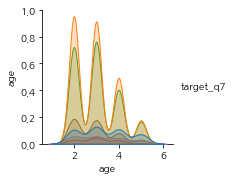

In [38]:
sns.pairplot(df, hue = 'target_q7')

In [40]:
df.columns

Index(['sex', 'age', 'area', 'q1', 'q3', 'q6', 'q9', 'q10', 'q11', 'q12',
       'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21', 'q22',
       'target_q7'],
      dtype='object')

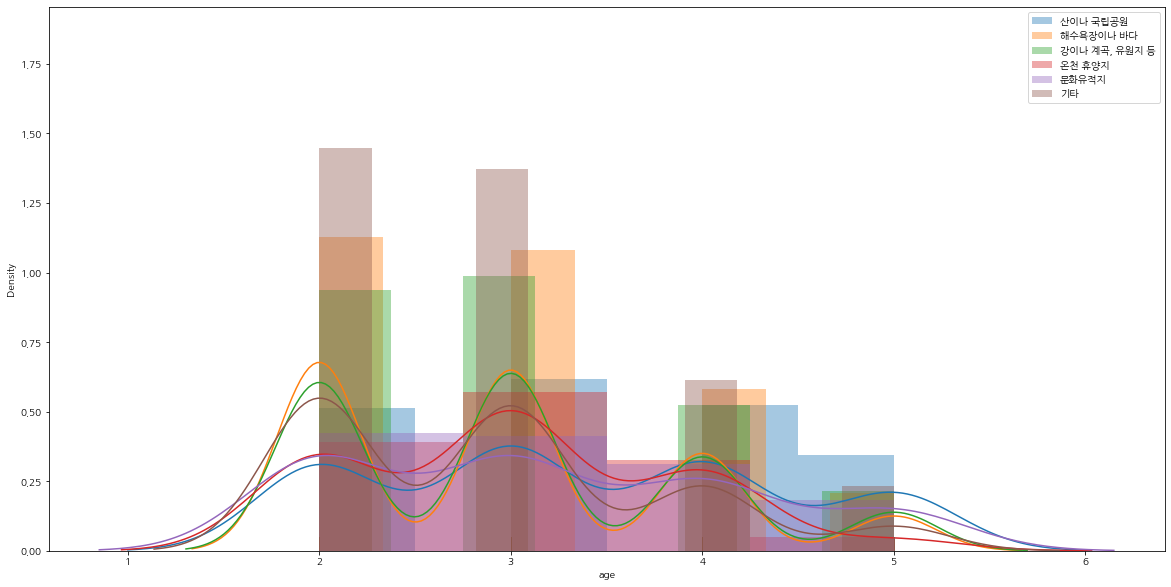

In [46]:
plt.figure(figsize=(20, 10))
for i in target_names:
    sns.distplot(df[df.target_q7==i]["age"], hist=True, rug = True, label=i)
    plt.legend() #범례
    plt.plot()

In [47]:
from pandas.plotting import parallel_coordinates

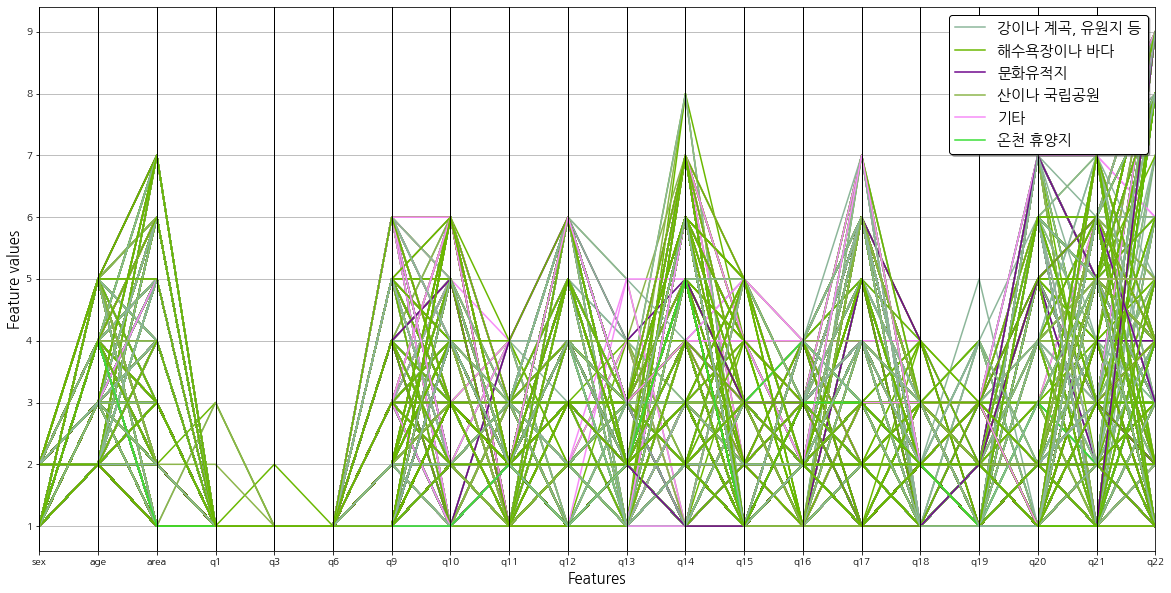

In [49]:
plt.figure(figsize=(20, 10))
parallel_coordinates(df, "target_q7") ##dataframe, target
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [50]:
ss = StandardScaler()

In [51]:
ss.fit_transform(df.iloc[:,:-1])[:5]

array([[-1.21288934, -1.0772872 , -0.42349246, -0.03477298, -0.01790287,
         0.        ,  2.96717181,  1.83915739,  0.08468345,  1.82728945,
        -0.07315382, -1.44256887, -0.52344714, -0.41097904,  0.38743637,
         0.19298873, -0.66729342,  3.72087575,  0.74525691,  2.51675399],
       [-1.21288934, -0.0199874 ,  0.75189213, -0.03477298, -0.01790287,
         0.        , -0.75820562,  0.14468943,  0.08468345, -1.00437409,
        -1.71569395,  0.37554559, -0.52344714,  0.940618  ,  0.38743637,
        -1.43930889, -0.66729342, -0.53369586,  1.27775389,  0.92671569],
       [-1.21288934,  2.09461219,  0.16419983, -0.03477298, -0.01790287,
         0.        , -0.75820562, -1.54977853,  0.08468345,  1.82728945,
        -0.07315382, -0.23049256, -0.52344714,  0.940618  ,  1.46803413,
         0.19298873,  0.9446437 , -0.53369586, -1.38473101,  0.13169654],
       [ 0.82447752, -1.0772872 ,  1.92727671, -0.03477298, -0.01790287,
         0.        , -0.75820562,  0.99192341, -

In [52]:
X_train_s = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
X_train_s

,sex,age,area,q1,q3,q6,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22
0,0.823740,1.025356,0.168479,-0.026864,-0.02002,0.0,-0.748821,0.142032,0.077621,1.814367,1.564827,-1.442765,-0.524763,0.957717,1.472615,0.178202,0.928931,-0.537486,1.803718,1.290762
1,0.823740,-0.023533,0.168479,-0.026864,-0.02002,0.0,0.005135,-0.702045,0.077621,-0.995324,-0.071456,-0.838141,-0.524763,-0.399729,0.393130,0.178202,0.928931,-0.537486,-0.331234,2.466295
2,-1.213975,-0.023533,0.168479,-0.026864,-0.02002,0.0,-0.748821,0.142032,0.077621,-0.433386,1.564827,0.371107,-0.524763,0.957717,-1.226098,0.178202,2.535730,0.173842,-0.331234,0.898918
3,0.823740,-1.072422,0.758275,-0.026864,-0.02002,0.0,-0.748821,0.986109,0.077621,0.690491,-0.071456,0.371107,-0.524763,-0.399729,0.393130,1.778172,-0.677869,-0.537486,0.736242,-0.668459
4,-1.213975,1.025356,-0.421316,-0.026864,-0.02002,0.0,0.005135,0.142032,0.077621,0.690491,-0.071456,0.975732,1.507522,-0.399729,-1.226098,0.178202,0.928931,0.173842,0.736242,0.115230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2491,0.823740,1.025356,-0.421316,-0.026864,-0.02002,0.0,0.005135,0.986109,0.077621,-0.995324,-0.071456,1.580356,-0.524763,-0.399729,0.932873,0.178202,-0.677869,-0.537486,-1.398710,-0.668459
2492,0.823740,2.074245,0.758275,-0.026864,-0.02002,0.0,0.759092,0.986109,0.077621,1.252429,-0.071456,-0.838141,0.491380,-1.757175,1.472615,0.178202,0.928931,0.173842,-1.398710,-0.276614
2493,0.823740,-0.023533,1.348070,-0.026864,-0.02002,0.0,0.759092,0.142032,0.077621,-0.995324,-0.071456,0.975732,2.523665,0.957717,-1.226098,0.178202,-0.677869,-0.537486,-1.398710,-0.668459
2494,0.823740,1.025356,-1.011112,-0.026864,-0.02002,0.0,-0.748821,-0.702045,0.077621,-0.433386,-0.071456,0.975732,-0.524763,2.315163,0.393130,-1.421768,-0.677869,0.173842,-1.398710,2.074451


In [54]:
X_test_s = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)
X_test_s

,sex,age,area,q1,q3,q6,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22
0,0.823740,-1.072422,0.168479,-0.026864,-0.02002,0.0,-0.748821,-0.702045,0.077621,-0.995324,-0.071456,0.371107,-0.524763,0.957717,0.393130,0.178202,-0.677869,-0.537486,0.736242,-0.668459
1,0.823740,-0.023533,-1.011112,-0.026864,-0.02002,0.0,2.267005,-0.702045,0.077621,1.252429,-0.071456,0.975732,-0.524763,-0.399729,-1.226098,-1.421768,-0.677869,-0.537486,-0.331234,-0.668459
2,0.823740,-1.072422,1.348070,-0.026864,-0.02002,0.0,-0.748821,-0.702045,-1.821804,0.690491,-0.071456,-1.442765,1.507522,-0.399729,0.393130,0.178202,0.928931,-0.537486,-0.331234,-0.668459
3,-1.213975,1.025356,-1.011112,-0.026864,-0.02002,0.0,-0.748821,0.142032,0.077621,-0.995324,-0.071456,1.580356,-0.524763,-0.399729,-0.146613,0.178202,-0.677869,-0.537486,0.736242,0.115230
4,0.823740,-1.072422,-0.421316,-0.026864,-0.02002,0.0,0.759092,-0.702045,0.077621,-0.995324,-0.071456,-0.233517,-0.524763,0.957717,1.472615,0.178202,-0.677869,0.173842,-0.331234,-0.668459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,0.823740,-0.023533,0.168479,-0.026864,-0.02002,0.0,-0.748821,2.674263,0.077621,0.690491,-0.071456,2.184980,-0.524763,0.957717,-0.146613,0.178202,-0.677869,-0.537486,1.269980,0.507074
621,0.823740,-1.072422,-1.011112,-0.026864,-0.02002,0.0,-0.748821,0.142032,-1.821804,-0.995324,-0.071456,0.975732,-0.524763,-0.399729,1.472615,1.778172,0.928931,-0.537486,-1.398710,-0.668459
622,-1.213975,-0.023533,0.168479,-0.026864,-0.02002,0.0,1.513048,-1.546121,-1.821804,-0.995324,-0.071456,-0.233517,-0.524763,-0.399729,-0.686356,0.178202,-0.677869,3.019156,0.736242,-0.668459
623,0.823740,-1.072422,1.348070,-0.026864,-0.02002,0.0,0.005135,-0.702045,0.077621,-0.433386,1.564827,-0.838141,-0.524763,-1.757175,0.393130,0.178202,-0.677869,3.019156,0.736242,-0.668459


In [55]:
ms = MinMaxScaler()

In [56]:
X_train_m = pd.DataFrame(ms.fit_transform(X_train), columns = X_train.columns)
X_test_m = pd.DataFrame(ms.transform(X_test), columns = X_test.columns)
X_train_m.head()

,sex,age,area,q1,q3,q6,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q19,q20,q21,q22
0,1.0,0.666667,0.333333,0.0,0.0,0.0,0.0,0.4,0.333333,1.0,0.50,0.000000,0.0,0.666667,0.833333,0.333333,0.25,0.000000,1.000000,0.625
1,1.0,0.333333,0.333333,0.0,0.0,0.0,0.2,0.2,0.333333,0.0,0.25,0.142857,0.0,0.333333,0.500000,0.333333,0.25,0.000000,0.333333,1.000
2,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.4,0.333333,0.2,0.50,0.428571,0.0,0.666667,0.000000,0.333333,0.50,0.166667,0.333333,0.500
3,1.0,0.000000,0.500000,0.0,0.0,0.0,0.0,0.6,0.333333,0.6,0.25,0.428571,0.0,0.333333,0.500000,0.666667,0.00,0.000000,0.666667,0.000
4,0.0,0.666667,0.166667,0.0,0.0,0.0,0.2,0.4,0.333333,0.6,0.25,0.571429,0.5,0.333333,0.000000,0.333333,0.25,0.166667,0.666667,0.250


In [57]:
ss_df_values = ss.fit_transform(df.iloc[:,:-1])
ss_df_values[:5]

array([[-1.21288934, -1.0772872 , -0.42349246, -0.03477298, -0.01790287,
         0.        ,  2.96717181,  1.83915739,  0.08468345,  1.82728945,
        -0.07315382, -1.44256887, -0.52344714, -0.41097904,  0.38743637,
         0.19298873, -0.66729342,  3.72087575,  0.74525691,  2.51675399],
       [-1.21288934, -0.0199874 ,  0.75189213, -0.03477298, -0.01790287,
         0.        , -0.75820562,  0.14468943,  0.08468345, -1.00437409,
        -1.71569395,  0.37554559, -0.52344714,  0.940618  ,  0.38743637,
        -1.43930889, -0.66729342, -0.53369586,  1.27775389,  0.92671569],
       [-1.21288934,  2.09461219,  0.16419983, -0.03477298, -0.01790287,
         0.        , -0.75820562, -1.54977853,  0.08468345,  1.82728945,
        -0.07315382, -0.23049256, -0.52344714,  0.940618  ,  1.46803413,
         0.19298873,  0.9446437 , -0.53369586, -1.38473101,  0.13169654],
       [ 0.82447752, -1.0772872 ,  1.92727671, -0.03477298, -0.01790287,
         0.        , -0.75820562,  0.99192341, -

In [62]:
ss_df = pd.DataFrame(data = ss_df_values,
                    columns = df.columns[:-1])
ss_df['target_q7'] = df['target_q7']
ss_df

,sex,age,area,q1,q3,q6,q9,q10,q11,q12,...,q14,q15,q16,q17,q18,q19,q20,q21,q22,target_q7
0,-1.212889,-1.077287,-0.423492,-0.034773,-0.017903,0.0,2.967172,1.839157,0.084683,1.827289,...,-1.442569,-0.523447,-0.410979,0.387436,0.192989,-0.667293,3.720876,0.745257,2.516754,"강이나 계곡, 유원지 등"
1,-1.212889,-0.019987,0.751892,-0.034773,-0.017903,0.0,-0.758206,0.144689,0.084683,-1.004374,...,0.375546,-0.523447,0.940618,0.387436,-1.439309,-0.667293,-0.533696,1.277754,0.926716,해수욕장이나 바다
2,-1.212889,2.094612,0.164200,-0.034773,-0.017903,0.0,-0.758206,-1.549779,0.084683,1.827289,...,-0.230493,-0.523447,0.940618,1.468034,0.192989,0.944644,-0.533696,-1.384731,0.131697,해수욕장이나 바다
3,0.824478,-1.077287,1.927277,-0.034773,-0.017903,0.0,-0.758206,0.991923,-1.803153,-1.004374,...,0.375546,-0.523447,-0.410979,1.468034,1.825286,0.944644,-0.533696,-1.384731,-0.663323,"강이나 계곡, 유원지 등"
4,0.824478,-1.077287,-1.011185,-0.034773,-0.017903,0.0,-0.758206,-0.702545,0.084683,-0.438041,...,-1.442569,0.507916,-0.410979,-0.152863,0.192989,-0.667293,-0.533696,-0.319737,-0.663323,"강이나 계곡, 유원지 등"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,-1.212889,1.037312,1.927277,-0.034773,-0.017903,0.0,-0.758206,0.144689,0.084683,0.694624,...,1.587622,3.602004,-0.410979,-1.233460,-1.439309,-0.667293,-0.533696,1.810251,-0.663323,해수욕장이나 바다
3117,0.824478,-1.077287,0.751892,-0.034773,-0.017903,0.0,-0.758206,0.991923,0.084683,0.694624,...,0.375546,-0.523447,-0.410979,0.387436,1.825286,-0.667293,-0.533696,0.745257,-0.663323,"강이나 계곡, 유원지 등"
3118,-1.212889,-0.019987,-0.423492,-0.034773,-0.017903,0.0,-0.758206,0.991923,0.084683,-1.004374,...,1.587622,-0.523447,-0.410979,-0.152863,-1.439309,-0.667293,-0.533696,1.277754,2.119244,"강이나 계곡, 유원지 등"
3119,-1.212889,2.094612,1.339584,-0.034773,-0.017903,0.0,-0.758206,0.144689,-1.803153,1.260957,...,0.375546,-0.523447,0.940618,-1.233460,0.192989,0.944644,-0.533696,-1.384731,0.529206,해수욕장이나 바다


In [66]:
ms_df_values = ms.fit_transform(df.iloc[:,:-1])
ms_df_values[:5]

array([[0.        , 0.        , 0.16666667, 0.        , 0.        ,
        0.        , 1.        , 0.8       , 0.33333333, 1.        ,
        0.25      , 0.        , 0.        , 0.33333333, 0.5       ,
        0.33333333, 0.        , 1.        , 0.66666667, 1.        ],
       [0.        , 0.33333333, 0.5       , 0.        , 0.        ,
        0.        , 0.        , 0.4       , 0.33333333, 0.        ,
        0.        , 0.42857143, 0.        , 0.66666667, 0.5       ,
        0.        , 0.        , 0.        , 0.83333333, 0.5       ],
       [0.        , 1.        , 0.33333333, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.33333333, 1.        ,
        0.25      , 0.28571429, 0.        , 0.66666667, 0.83333333,
        0.33333333, 0.25      , 0.        , 0.        , 0.25      ],
       [1.        , 0.        , 0.83333333, 0.        , 0.        ,
        0.        , 0.        , 0.6       , 0.        , 0.        ,
        0.25      , 0.42857143, 0.        , 0

In [68]:
ms_df = pd.DataFrame(data = ms_df_values,
                    columns = df.columns[:-1])
ms_df['target_q7'] = df['target_q7']
ms_df

,sex,age,area,q1,q3,q6,q9,q10,q11,q12,...,q14,q15,q16,q17,q18,q19,q20,q21,q22,target_q7
0,0.0,0.000000,0.166667,0.0,0.0,0.0,1.0,0.8,0.333333,1.0,...,0.000000,0.00,0.333333,0.500000,0.333333,0.00,1.0,0.666667,1.000,"강이나 계곡, 유원지 등"
1,0.0,0.333333,0.500000,0.0,0.0,0.0,0.0,0.4,0.333333,0.0,...,0.428571,0.00,0.666667,0.500000,0.000000,0.00,0.0,0.833333,0.500,해수욕장이나 바다
2,0.0,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,1.0,...,0.285714,0.00,0.666667,0.833333,0.333333,0.25,0.0,0.000000,0.250,해수욕장이나 바다
3,1.0,0.000000,0.833333,0.0,0.0,0.0,0.0,0.6,0.000000,0.0,...,0.428571,0.00,0.333333,0.833333,0.666667,0.25,0.0,0.000000,0.000,"강이나 계곡, 유원지 등"
4,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.2,0.333333,0.2,...,0.000000,0.25,0.333333,0.333333,0.333333,0.00,0.0,0.333333,0.000,"강이나 계곡, 유원지 등"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,0.0,0.666667,0.833333,0.0,0.0,0.0,0.0,0.4,0.333333,0.6,...,0.714286,1.00,0.333333,0.000000,0.000000,0.00,0.0,1.000000,0.000,해수욕장이나 바다
3117,1.0,0.000000,0.500000,0.0,0.0,0.0,0.0,0.6,0.333333,0.6,...,0.428571,0.00,0.333333,0.500000,0.666667,0.00,0.0,0.666667,0.000,"강이나 계곡, 유원지 등"
3118,0.0,0.333333,0.166667,0.0,0.0,0.0,0.0,0.6,0.333333,0.0,...,0.714286,0.00,0.333333,0.333333,0.000000,0.00,0.0,0.833333,0.875,"강이나 계곡, 유원지 등"
3119,0.0,1.000000,0.666667,0.0,0.0,0.0,0.0,0.4,0.000000,0.8,...,0.428571,0.00,0.666667,0.000000,0.333333,0.25,0.0,0.000000,0.375,해수욕장이나 바다


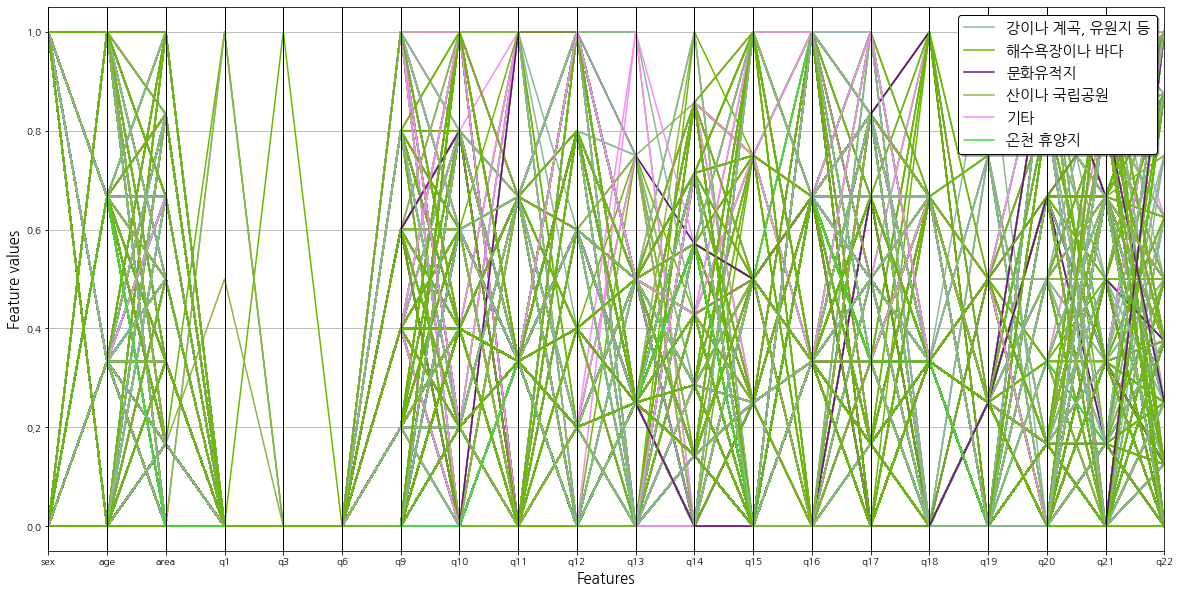

In [71]:
plt.figure(figsize=(20, 10))
parallel_coordinates(ms_df, "target_q7") ##dataframe, target
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.show()

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
# cross_val_score: 다양한 샘플링으 ㄹ해서 여러번 테스트 --> 평균치를 구해본다.!
from sklearn.metrics import *

In [73]:
knn = KNeighborsClassifier()

In [77]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
# 샘플링을 10개해서, 10번 검증을 해보세요! 의미
# X_train을 train data, validation data로 나눈다.
# cv(fold값) 가 10이면 validation data를 X_train의 1/10로 잡음
# validation data의 개수는 12개, 나머지가 train data

scores = cross_val_score(knn, X_train, y_train, cv=10) #cv = fold값!
scores = list(scores)

In [79]:
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
                                                    ms_df.iloc[:, :-1], #문제,
                                                    ms_df.iloc[:, -1], #정답,
                                                    test_size=0.2, #테스트 비율,
                                                    random_state=42#랜덤 시드값
)

In [80]:
def print_metrics(model, x, y, k=10):
    scores2 = list(cross_val_score(model, x, y, cv=k)) #cv = fold값
    np.set_printoptions(formatter={'float': '{: 0.3f}'.format}, suppress=True)
    print("-------------교차검증 결과-------------\n", scores2)
    acc_mean = np.mean(scores)
    print("-------------교차검증 평균-------------\n{:.3f}".format(acc_mean))
    return scores2, acc_mean

In [81]:
pred = knn.predict(X_test)
acc = accuracy_score(y_test, pred)
pred

array(['해수욕장이나 바다', '강이나 계곡, 유원지 등', '강이나 계곡, 유원지 등', '해수욕장이나 바다',
       '강이나 계곡, 유원지 등', '강이나 계곡, 유원지 등', '강이나 계곡, 유원지 등', '해수욕장이나 바다',
       '산이나 국립공원', '해수욕장이나 바다', '해수욕장이나 바다', '산이나 국립공원', '강이나 계곡, 유원지 등',
       '강이나 계곡, 유원지 등', '해수욕장이나 바다', '강이나 계곡, 유원지 등', '강이나 계곡, 유원지 등',
       '강이나 계곡, 유원지 등', '강이나 계곡, 유원지 등', '강이나 계곡, 유원지 등', '해수욕장이나 바다',
       '강이나 계곡, 유원지 등', '해수욕장이나 바다', '해수욕장이나 바다', '강이나 계곡, 유원지 등',
       '강이나 계곡, 유원지 등', '해수욕장이나 바다', '강이나 계곡, 유원지 등', '해수욕장이나 바다',
       '강이나 계곡, 유원지 등', '강이나 계곡, 유원지 등', '기타', '강이나 계곡, 유원지 등',
       '해수욕장이나 바다', '해수욕장이나 바다', '강이나 계곡, 유원지 등', '강이나 계곡, 유원지 등',
       '강이나 계곡, 유원지 등', '강이나 계곡, 유원지 등', '강이나 계곡, 유원지 등', '해수욕장이나 바다',
       '강이나 계곡, 유원지 등', '해수욕장이나 바다', '해수욕장이나 바다', '강이나 계곡, 유원지 등',
       '해수욕장이나 바다', '해수욕장이나 바다', '해수욕장이나 바다', '해수욕장이나 바다',
       '강이나 계곡, 유원지 등', '강이나 계곡, 유원지 등', '해수욕장이나 바다', '강이나 계곡, 유원지 등',
       '해수욕장이나 바다', '문화유적지', '강이나 계곡, 유원지 등', '기타', '강이나 계곡, 유원지 등',
       '강이나 계곡, 유원지 등', '강이나 계곡, 유원지 등', '강이

-------------교차검증 결과-------------
 [0.358, 0.3667334669338677, 0.36472945891783565, 0.35671342685370744, 0.38877755511022044]
-------------교차검증 평균-------------
0.362


(array([ 2.000,  0.000,  1.000,  1.000,  0.000,  0.000,  0.000,  0.000,
         0.000,  1.000]),
 array([ 0.357,  0.360,  0.363,  0.366,  0.370,  0.373,  0.376,  0.379,
         0.382,  0.386,  0.389]),
 <BarContainer object of 10 artists>)

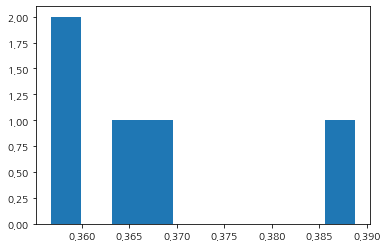

In [82]:
sc2, am2 = print_metrics(knn, X_train, y_train, 5)
plt.hist(sc2)

In [83]:
grid_params = {
    'n_neighbors' : list(range(1,20)), #19개
    'weights' :["uniform", "distance"], #2개
    'metric':['euclidean', 'manhattan', 'minkowski'] #3개
} ## 19 * 2 * 3
#fold = 5,

In [84]:
gs_model = GridSearchCV(knn, grid_params, cv = 5)
gs_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [85]:
print(gs_model.best_estimator_)
print(gs_model.best_index_)
print(gs_model.best_params_)
print(gs_model.best_score_)

KNeighborsClassifier(metric='euclidean', n_neighbors=16)
30
{'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'uniform'}
0.41827975951903806


In [86]:
best_knn = jBEs= KNeighborsClassifier(
    metric = 'euclidean', 
    n_neighbors = 10,
    weights ='uniform'
)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [87]:
best_knn = KNeighborsClassifier(
    metric = 'manhattan', 
    n_neighbors = 14, 
    weights = 'uniform')
best_knn.fit(X_train, y_train) #문제+답 훈련!!!

######test로 예측한 결과값######
pred3 = best_knn.predict(X_test) #모의고사=>작성한 답
acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제답안지 비교
acc3

0.4256

In [88]:
# {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}
best_knn = KNeighborsClassifier(
    metric = 'euclidean', 
    n_neighbors = 10, 
    weights = 'uniform')
best_knn.fit(X_train, y_train) #문제+답 훈련!!!

######test로 예측한 결과값######
pred3 = best_knn.predict(X_test) #모의고사=>작성한 답
acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제답안지 비교
acc3

0.4272

In [89]:
def print_test_metrics(model, X_test, y_test):
    print('*** Test data Accuracy ***')
    pred3 = best_knn.predict(X_test) #모의고사=>작성한 답
    acc3 = accuracy_score(y_test, pred3) #작성한 답과 실제답안지 비교
    print('{:2f}'.format(acc3))
    print('*** Confusion Matrix ***')
    print(confusion_matrix(y_test, pred3))
    print('*** Confusion Matrix(precision) ***')
    print(precision_score(y_test, pred3, average='macro'))
    print('***classification re(precision) ***')
    print(classification_report(y_test, pred))

In [90]:
print_test_metrics(knn, X_test, y_test)

*** Test data Accuracy ***
0.427200
*** Confusion Matrix ***
[[117   5   0   3   0  98]
 [ 21   2   1   0   0  21]
 [ 16   0   0   0   0   9]
 [ 34   0   0   1   0  22]
 [ 11   1   0   0   0   6]
 [104   2   1   3   0 147]]
*** Confusion Matrix(precision) ***
0.20235737859500236
***classification re(precision) ***
               precision    recall  f1-score   support

강이나 계곡, 유원지 등       0.40      0.58      0.47       223
           기타       0.16      0.11      0.13        45
        문화유적지       0.40      0.08      0.13        25
     산이나 국립공원       0.16      0.07      0.10        57
       온천 휴양지       0.00      0.00      0.00        18
    해수욕장이나 바다       0.50      0.46      0.48       257

     accuracy                           0.41       625
    macro avg       0.27      0.22      0.22       625
 weighted avg       0.39      0.41      0.39       625



In [97]:
df_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state= 11)
svc_clf = SVC()
clf_list = [df_clf, rf_clf, svc_clf]
data = df.columns[:-1]

In [98]:
def exec_kfold(df, clf, k):
    acc_list = []
    kfold = KFold(n_splits=k)
    for i, (train_index, test_index) in enumerate(kfold.split(df[data])):
        X_train2,X_test2 = df[data].values[train_index], df[data].values[test_index]
        y_train2,y_test2 = df['target_q7'].values[train_index],df['target_q7'].values[test_index]
        
        clf.fit(X_train2, y_train2)
        pred2 = clf.predict(X_test2)
        acc = accuracy_score(y_test2, pred2)
        acc_list.append(acc)
        print(i , ': 교차검증 정확도>> {0:.2f}'.format(acc))
    print('평균 정확도>> {0:.2f}'.format(np.mean(acc_list)))
    return np.mean(acc_list)

In [99]:
acc_total = []
dt5 = []
dt10=[]
rf5 = []
rf10 = []
svc5 = []
svc10 = []

model_list = ['decision tree', 'random forest', 'svm']
for i, clf in enumerate(clf_list):
    for k in [5,10]:
        print(model_list[i], k, '----검증시작----')
        acc_result = exec_kfold(df, clf, k)
        acc_total.append(acc_result)

decision tree 5 ----검증시작----
0 : 교차검증 정확도>> 0.32
1 : 교차검증 정확도>> 0.33
2 : 교차검증 정확도>> 0.32
3 : 교차검증 정확도>> 0.28
4 : 교차검증 정확도>> 0.32
평균 정확도>> 0.32
decision tree 10 ----검증시작----
0 : 교차검증 정확도>> 0.31
1 : 교차검증 정확도>> 0.29
2 : 교차검증 정확도>> 0.34
3 : 교차검증 정확도>> 0.31
4 : 교차검증 정확도>> 0.30
5 : 교차검증 정확도>> 0.28
6 : 교차검증 정확도>> 0.31
7 : 교차검증 정확도>> 0.32
8 : 교차검증 정확도>> 0.31
9 : 교차검증 정확도>> 0.32
평균 정확도>> 0.31
random forest 5 ----검증시작----
0 : 교차검증 정확도>> 0.40
1 : 교차검증 정확도>> 0.45
2 : 교차검증 정확도>> 0.42
3 : 교차검증 정확도>> 0.42
4 : 교차검증 정확도>> 0.43
평균 정확도>> 0.42
random forest 10 ----검증시작----
0 : 교차검증 정확도>> 0.36
1 : 교차검증 정확도>> 0.41
2 : 교차검증 정확도>> 0.41
3 : 교차검증 정확도>> 0.40
4 : 교차검증 정확도>> 0.41
5 : 교차검증 정확도>> 0.43
6 : 교차검증 정확도>> 0.41
7 : 교차검증 정확도>> 0.39
8 : 교차검증 정확도>> 0.42
9 : 교차검증 정확도>> 0.45
평균 정확도>> 0.41
svm 5 ----검증시작----
0 : 교차검증 정확도>> 0.40
1 : 교차검증 정확도>> 0.41
2 : 교차검증 정확도>> 0.44
3 : 교차검증 정확도>> 0.41
4 : 교차검증 정확도>> 0.49
평균 정확도>> 0.43
svm 10 ----검증시작----
0 : 교차검증 정확도>> 0.39
1 : 교차검증 정확도>> 0.43
2 : 교차검증 정확도>> 0.44
3 : 교차검증 정확도>

In [100]:
for i in range(3):
    for k, x in enumerate([5,10]):
        print(model_list[i], x, " 교차검증 평균: ", acc_total[(2*i)+k])

decision tree 5  교차검증 평균:  0.31592205128205125
decision tree 10  교차검증 평균:  0.30983554517899564
random forest 5  교차검증 평균:  0.42487025641025644
random forest 10  교차검증 평균:  0.40853813385762267
svm 5  교차검증 평균:  0.42999846153846144
svm 10  교차검증 평균:  0.43096481526992714


In [101]:
# 최대 평균값 ==
max_value = np.max(acc_total)
# 최대 평균값 인덱스 ==
max_index = np.argmax(acc_total)
# 최대 평균값 모델명 ==
max_model = model_list[max_index//2]

print('최고 교차 검증 평균>> ', max_value)
print('최고 교차 검증 인덱스>> ', max_index)
print('최고 교차 검증 모델링>> ', max_model)

최고 교차 검증 평균>>  0.43096481526992714
최고 교차 검증 인덱스>>  5
최고 교차 검증 모델링>>  svm


In [106]:
imp_clf= df_clf.feature_importances_
imp_rf = rf_clf.feature_importances_
print(imp_clf)

[ 0.028  0.052  0.081  0.001  0.000  0.000  0.061  0.069  0.052  0.086
  0.046  0.074  0.020  0.061  0.085  0.048  0.034  0.051  0.085  0.067]


In [107]:
imp_rf

array([ 0.030,  0.058,  0.083,  0.001,  0.000,  0.000,  0.070,  0.069,
        0.040,  0.072,  0.042,  0.082,  0.036,  0.050,  0.085,  0.047,
        0.042,  0.054,  0.077,  0.065])

<BarContainer object of 20 artists>

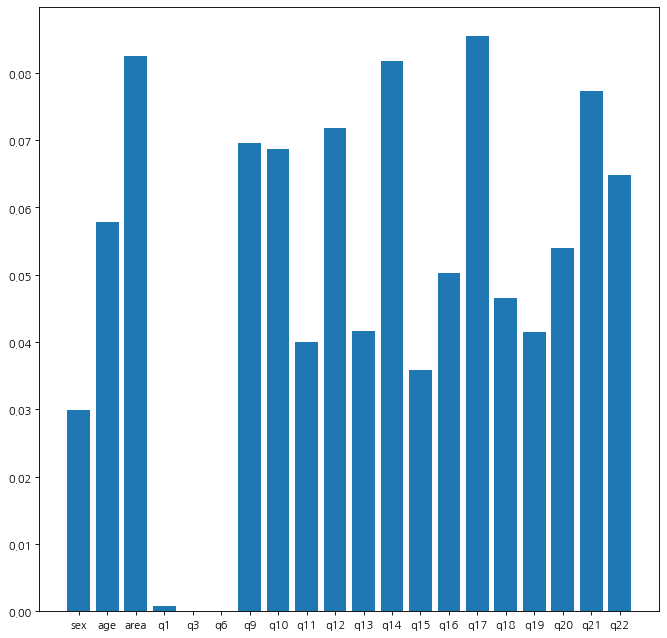

In [105]:
plt.figure(figsize=(10, 10), dpi=80)
plt.bar(df[data].columns, rf_clf.feature_importances_)

<BarContainer object of 20 artists>

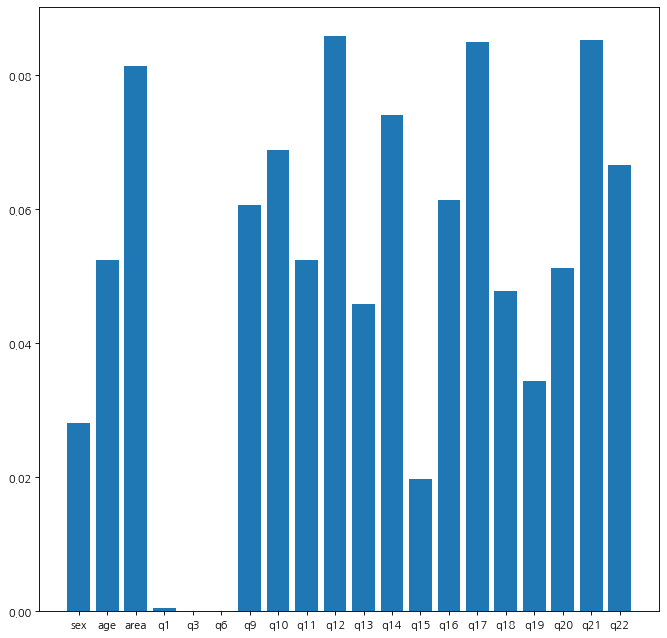

In [109]:
plt.figure(figsize=(10, 10), dpi=80)
plt.bar(df[data].columns, df_clf.feature_importances_)

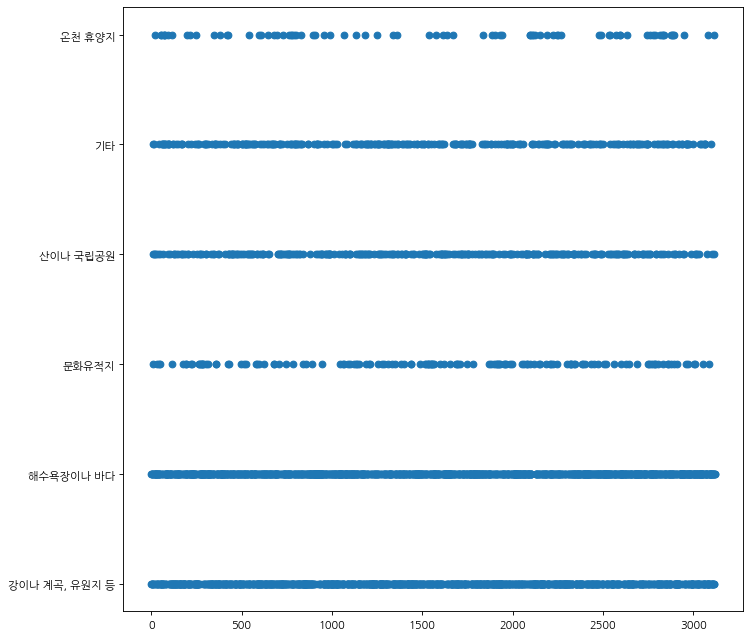

In [110]:
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(df.index, df['target_q7'])
plt.show()

<AxesSubplot:>

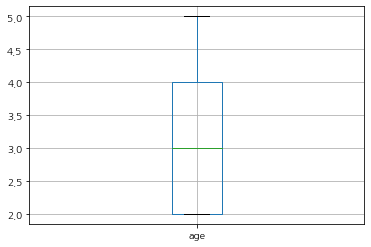

In [111]:
df.boxplot()

<AxesSubplot:>

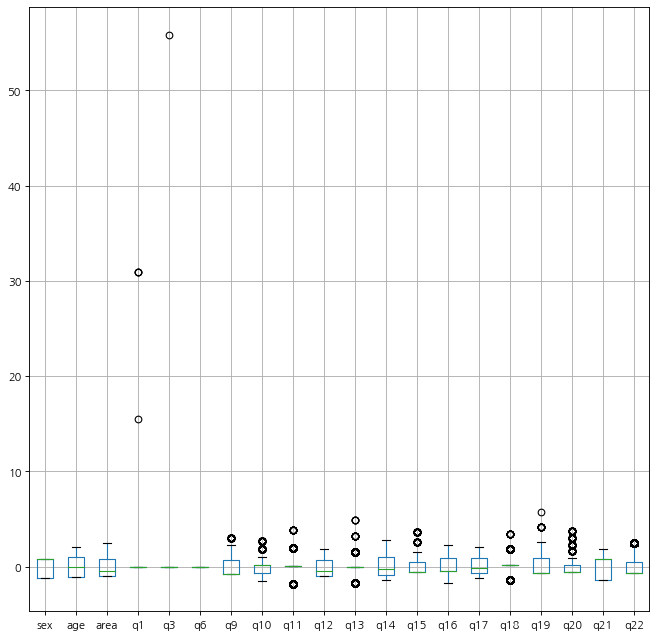

In [114]:
plt.figure(figsize=(10, 10), dpi=80)
ss_df.boxplot()

<AxesSubplot:>

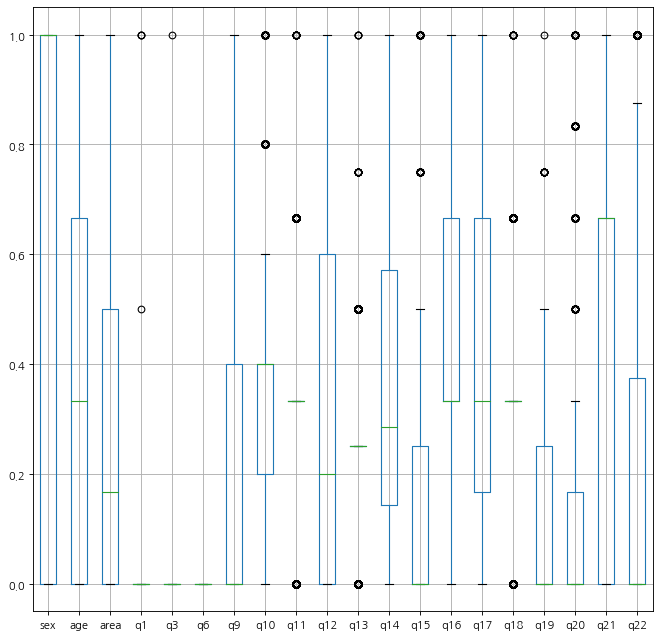

In [117]:
plt.figure(figsize=(10, 10), dpi=80)
ms_df.boxplot()

In [118]:
df

,sex,age,area,q1,q3,q6,q9,q10,q11,q12,...,q14,q15,q16,q17,q18,q19,q20,q21,q22,target_q7
0,1.0,2.0,2.0,1.0,1.0,1.0,6.0,5.0,2.0,6.0,...,1.0,1.0,2.0,4.0,2.0,1.0,7.0,5.0,9.0,"강이나 계곡, 유원지 등"
1,1.0,3.0,4.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,...,4.0,1.0,3.0,4.0,1.0,1.0,1.0,6.0,5.0,해수욕장이나 바다
2,1.0,5.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,6.0,...,3.0,1.0,3.0,6.0,2.0,2.0,1.0,1.0,3.0,해수욕장이나 바다
3,2.0,2.0,6.0,1.0,1.0,1.0,1.0,4.0,1.0,1.0,...,4.0,1.0,2.0,6.0,3.0,2.0,1.0,1.0,1.0,"강이나 계곡, 유원지 등"
4,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,...,1.0,2.0,2.0,3.0,2.0,1.0,1.0,3.0,1.0,"강이나 계곡, 유원지 등"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116,1.0,4.0,6.0,1.0,1.0,1.0,1.0,3.0,2.0,4.0,...,6.0,5.0,2.0,1.0,1.0,1.0,1.0,7.0,1.0,해수욕장이나 바다
3117,2.0,2.0,4.0,1.0,1.0,1.0,1.0,4.0,2.0,4.0,...,4.0,1.0,2.0,4.0,3.0,1.0,1.0,5.0,1.0,"강이나 계곡, 유원지 등"
3118,1.0,3.0,2.0,1.0,1.0,1.0,1.0,4.0,2.0,1.0,...,6.0,1.0,2.0,3.0,1.0,1.0,1.0,6.0,8.0,"강이나 계곡, 유원지 등"
3119,1.0,5.0,5.0,1.0,1.0,1.0,1.0,3.0,1.0,5.0,...,4.0,1.0,3.0,1.0,2.0,2.0,1.0,1.0,4.0,해수욕장이나 바다


In [119]:
df.to_csv('2010summer_wTarget.csv')

In [162]:
dfc = pd.read_csv('C:/Users/hi/Desktop/Automobile_data.csv')
dfc

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


In [163]:
dfc.pivot(index='index', columns='engine-type', values=['horsepower','price'])

horsepower                                       price            \
engine-type       dohc dohcv   l    ohc ohcf   ohcv rotor     dohc dohcv   l   
index                                                                          
0                111.0   NaN NaN    NaN  NaN    NaN   NaN  13495.0   NaN NaN   
1                111.0   NaN NaN    NaN  NaN    NaN   NaN  16500.0   NaN NaN   
2                  NaN   NaN NaN    NaN  NaN  154.0   NaN      NaN   NaN NaN   
3                  NaN   NaN NaN  102.0  NaN    NaN   NaN      NaN   NaN NaN   
4                  NaN   NaN NaN  115.0  NaN    NaN   NaN      NaN   NaN NaN   
...                ...   ...  ..    ...  ...    ...   ...      ...   ...  ..   
81                 NaN   NaN NaN   85.0  NaN    NaN   NaN      NaN   NaN NaN   
82                 NaN   NaN NaN   52.0  NaN    NaN   NaN      NaN   NaN NaN   
86                 NaN   NaN NaN  100.0  NaN    NaN   NaN      NaN   NaN NaN   
87                 NaN   NaN NaN  114.0  NaN    NaN   NaN      NaN   NaN NaN   
88                 NaN   NaN NaN  114.0  NaN    NaN   NaN      NaN   NaN NaN   

                                          
engine-type      ohc ohcf     ohcv rotor  
index                                     
0                NaN  NaN      NaN   NaN  
1                NaN  NaN      NaN   NaN  
2                NaN  NaN  16500.0   NaN  
3            13950.0  NaN      NaN   NaN  
4            17450.0  NaN      NaN   NaN  
...              ...  ...      ...   ...  
81            7975.0  NaN      NaN   NaN  
82            7995.0  NaN      NaN   NaN  
86            9995.0  NaN      NaN   NaN  
87           12940.0  NaN      NaN   NaN  
88           13415.0  NaN      NaN   NaN  

[61 rows x 14 columns]

In [164]:
dfc.pivot_table(index='index', columns='engine-type', values=['horsepower','price'])

horsepower                                       price      \
engine-type       dohc dohcv   l    ohc ohcf   ohcv rotor     dohc   l   
index                                                                    
0                111.0   NaN NaN    NaN  NaN    NaN   NaN  13495.0 NaN   
1                111.0   NaN NaN    NaN  NaN    NaN   NaN  16500.0 NaN   
2                  NaN   NaN NaN    NaN  NaN  154.0   NaN      NaN NaN   
3                  NaN   NaN NaN  102.0  NaN    NaN   NaN      NaN NaN   
4                  NaN   NaN NaN  115.0  NaN    NaN   NaN      NaN NaN   
...                ...   ...  ..    ...  ...    ...   ...      ...  ..   
81                 NaN   NaN NaN   85.0  NaN    NaN   NaN      NaN NaN   
82                 NaN   NaN NaN   52.0  NaN    NaN   NaN      NaN NaN   
86                 NaN   NaN NaN  100.0  NaN    NaN   NaN      NaN NaN   
87                 NaN   NaN NaN  114.0  NaN    NaN   NaN      NaN NaN   
88                 NaN   NaN NaN  114.0  NaN    NaN   NaN      NaN NaN   

                                          
engine-type      ohc ohcf     ohcv rotor  
index                                     
0                NaN  NaN      NaN   NaN  
1                NaN  NaN      NaN   NaN  
2                NaN  NaN  16500.0   NaN  
3            13950.0  NaN      NaN   NaN  
4            17450.0  NaN      NaN   NaN  
...              ...  ...      ...   ...  
81            7975.0  NaN      NaN   NaN  
82            7995.0  NaN      NaN   NaN  
86            9995.0  NaN      NaN   NaN  
87           12940.0  NaN      NaN   NaN  
88           13415.0  NaN      NaN   NaN  

[61 rows x 13 columns]

In [135]:
dfc

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


In [159]:
dfc_deep = dfc.copy(deep=True)
dfc_shallow = dfc.copy(deep=False)

dfc_deep.drop(columns='price', inplace=True)
dfc_shallow.drop(columns='average-mileage', inplace=True)
dfc_deep.iloc[0,1]=555555555
dfc_shallow.iloc[0,1]=9999999
dfc

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0
...,...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27,7975.0
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37,7995.0
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26,9995.0
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23,12940.0


In [161]:
price_d = dfc['price'].copy(deep=True)
price_s = dfc['price'].copy(deep=False)

price_d[0] = 1
price_s[0] = 0
dfc['price'][0]

0.0

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage
0,0,555555555,convertible,88.6,168.8,dohc,four,111,21
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19
3,3,audi,sedan,99.8,176.6,ohc,four,102,24
4,4,audi,sedan,99.4,176.6,ohc,five,115,18
...,...,...,...,...,...,...,...,...,...
56,81,volkswagen,sedan,97.3,171.7,ohc,four,85,27
57,82,volkswagen,sedan,97.3,171.7,ohc,four,52,37
58,86,volkswagen,sedan,97.3,171.7,ohc,four,100,26
59,87,volvo,sedan,104.3,188.8,ohc,four,114,23
